<a href="https://colab.research.google.com/github/semoennaciri/Tipemohamedennaciri/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#stroke prediction 

##Importation de la data 

In [1]:
from google.colab import files 
import io 
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.xlsx to healthcare-dataset-stroke-data.xlsx


### libraries

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import sklearn



##Data

In [44]:
data=pd.read_excel('healthcare-dataset-stroke-data.xlsx')
# drop id
data.drop("id", axis=1, inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.describe()

##Correlation


In [ ]:
mat=data.corr()
mat

##data visualisation 

In [ ]:
import plotly.express as px

df = px.data.tips()
fig = px.scatter(data, x="age", y="stroke", facet_col="stroke",
                 width=800, height=400)
fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(data, x="heart_disease",y='stroke',color='heart_disease',height=400)
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="ever_married",y='stroke',color='ever_married',height=400)
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="work_type",y='stroke',color='work_type',height=400)
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="smoking_status",y='stroke',color='smoking_status',height=400)
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="Residence_type",y='stroke',color='Residence_type',height=400)
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="stroke",color='stroke')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(x=data['avg_glucose_level'], y=data['stroke'])
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(x=data['bmi'], y=data['stroke'])
fig.show()

##data cleaning 

In [45]:
# train-test split
X = data.drop('stroke', axis=1)
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=34)

In [46]:
#  traitement des variables catégorielles
nominals = [c for c in X_train if X_train[c].dtypes=="object"]
for c in nominals:
    label_encoder = LabelEncoder()
    label_encoder.fit(list(X_train[c]) + list(X_test[c]))
    X_train[c] = label_encoder.transform(X_train[c])
    X_test[c] = label_encoder.transform(X_test[c])

In [47]:
# normalisation 
continious = [c for c in X_train if X_train[c].dtypes=="float64"]
sc = StandardScaler()
train_transformed = sc.fit_transform(X_train[continious])
X_train[continious] = pd.DataFrame(train_transformed,columns = X_train[continious].columns, index=X_train[continious].index)
X_test[continious] = pd.DataFrame(sc.transform(X_test[continious]),columns = X_test[continious].columns, index=X_test[continious].index)
# utiliser KNN-Imputer pour NaN
imputer = KNNImputer()
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

In [48]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
404,0.0,0.790171,0.0,0.0,1.0,3.0,0.0,-0.280756,-0.677838,0.0
4045,1.0,-0.278644,0.0,0.0,1.0,0.0,1.0,1.105688,0.804779,2.0
467,0.0,-0.011440,1.0,0.0,0.0,3.0,0.0,2.435104,-0.187930,2.0
3403,1.0,-0.902120,0.0,0.0,0.0,2.0,1.0,-0.403806,-0.716515,2.0
3189,0.0,-0.501314,0.0,0.0,1.0,2.0,1.0,-0.029832,-0.819653,2.0


##imbalanced data 

In [49]:
lg = LogisticRegression(random_state = 34)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

In [50]:
confusion_matrix(y_test, y_pred)

array([[1219,    0],
       [  59,    0]])

In [52]:
print('Train Score is : ' , lg.score(X_train, y_train))
print('Test Score is : ' , lg.score(X_test, y_test))

Train Score is :  0.9504175365344467
Test Score is :  0.9538341158059468


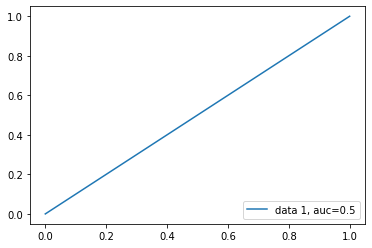

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##résolution du probleme

###under-sampling

In [53]:
from sklearn.utils import resample

# les classes 
train = X_train.copy()
train['stroke'] = y_train
stroke = train[(train.stroke == 1)]
not_stroke = train[(train.stroke == 0)]

not_stroke_downsampled = resample(not_stroke, replace=False, n_samples=len(stroke), random_state=34)
train_downsampled = pd.concat([not_stroke_downsampled, stroke]).sample(frac=1)
train_downsampled.stroke.value_counts()

1    190
0    190
Name: stroke, dtype: int64

In [54]:
downsampled_y = train_downsampled['stroke']
downsampled_X = train_downsampled.drop('stroke', axis=1)

###log regression after under-sampling




In [55]:
lg = LogisticRegression(random_state = 34)
lg.fit(downsampled_X, downsampled_y)
y_pred = lg.predict(X_test)

In [56]:
confusion_matrix(y_test, y_pred)

array([[876, 343],
       [ 16,  43]])

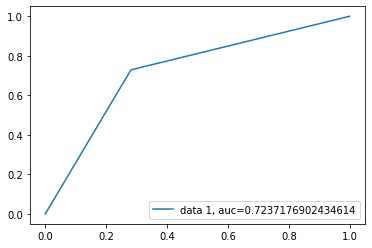

In [57]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
print('Train Score is : ' , lg.score(X_train, y_train))
print('Test Score is : ' , lg.score(X_test, y_test))

Train Score is :  0.7429540709812108
Test Score is :  0.7190923317683882


### over-sampling

In [59]:
stroke_upsampled = resample(stroke, replace=True, n_samples=len(not_stroke), random_state=34)
train_upsampled = pd.concat([stroke_upsampled, not_stroke]).sample(frac=1)
train_upsampled.stroke.value_counts()

0    3642
1    3642
Name: stroke, dtype: int64

In [60]:
upsampled_y = train_upsampled['stroke']
upsampled_X = train_upsampled.drop('stroke', axis=1)

###log regression after over-sampling

> Indented block



In [61]:
lg = LogisticRegression(random_state = 34)
lg.fit(upsampled_X, upsampled_y)
y_pred = lg.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[896, 323],
       [ 14,  45]])

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7363067292644757

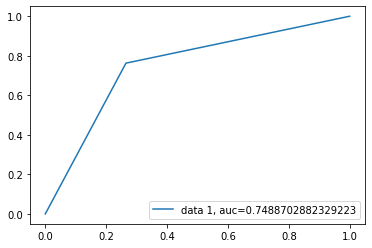

In [62]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()